In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fetal-health-classification/fetal_health.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline

In [3]:
df = pd.read_csv('../input/fetal-health-classification/fetal_health.csv')
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [4]:
df.shape

(2126, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [7]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [8]:
df.head(10).style.background_gradient(cmap="RdYlBu")

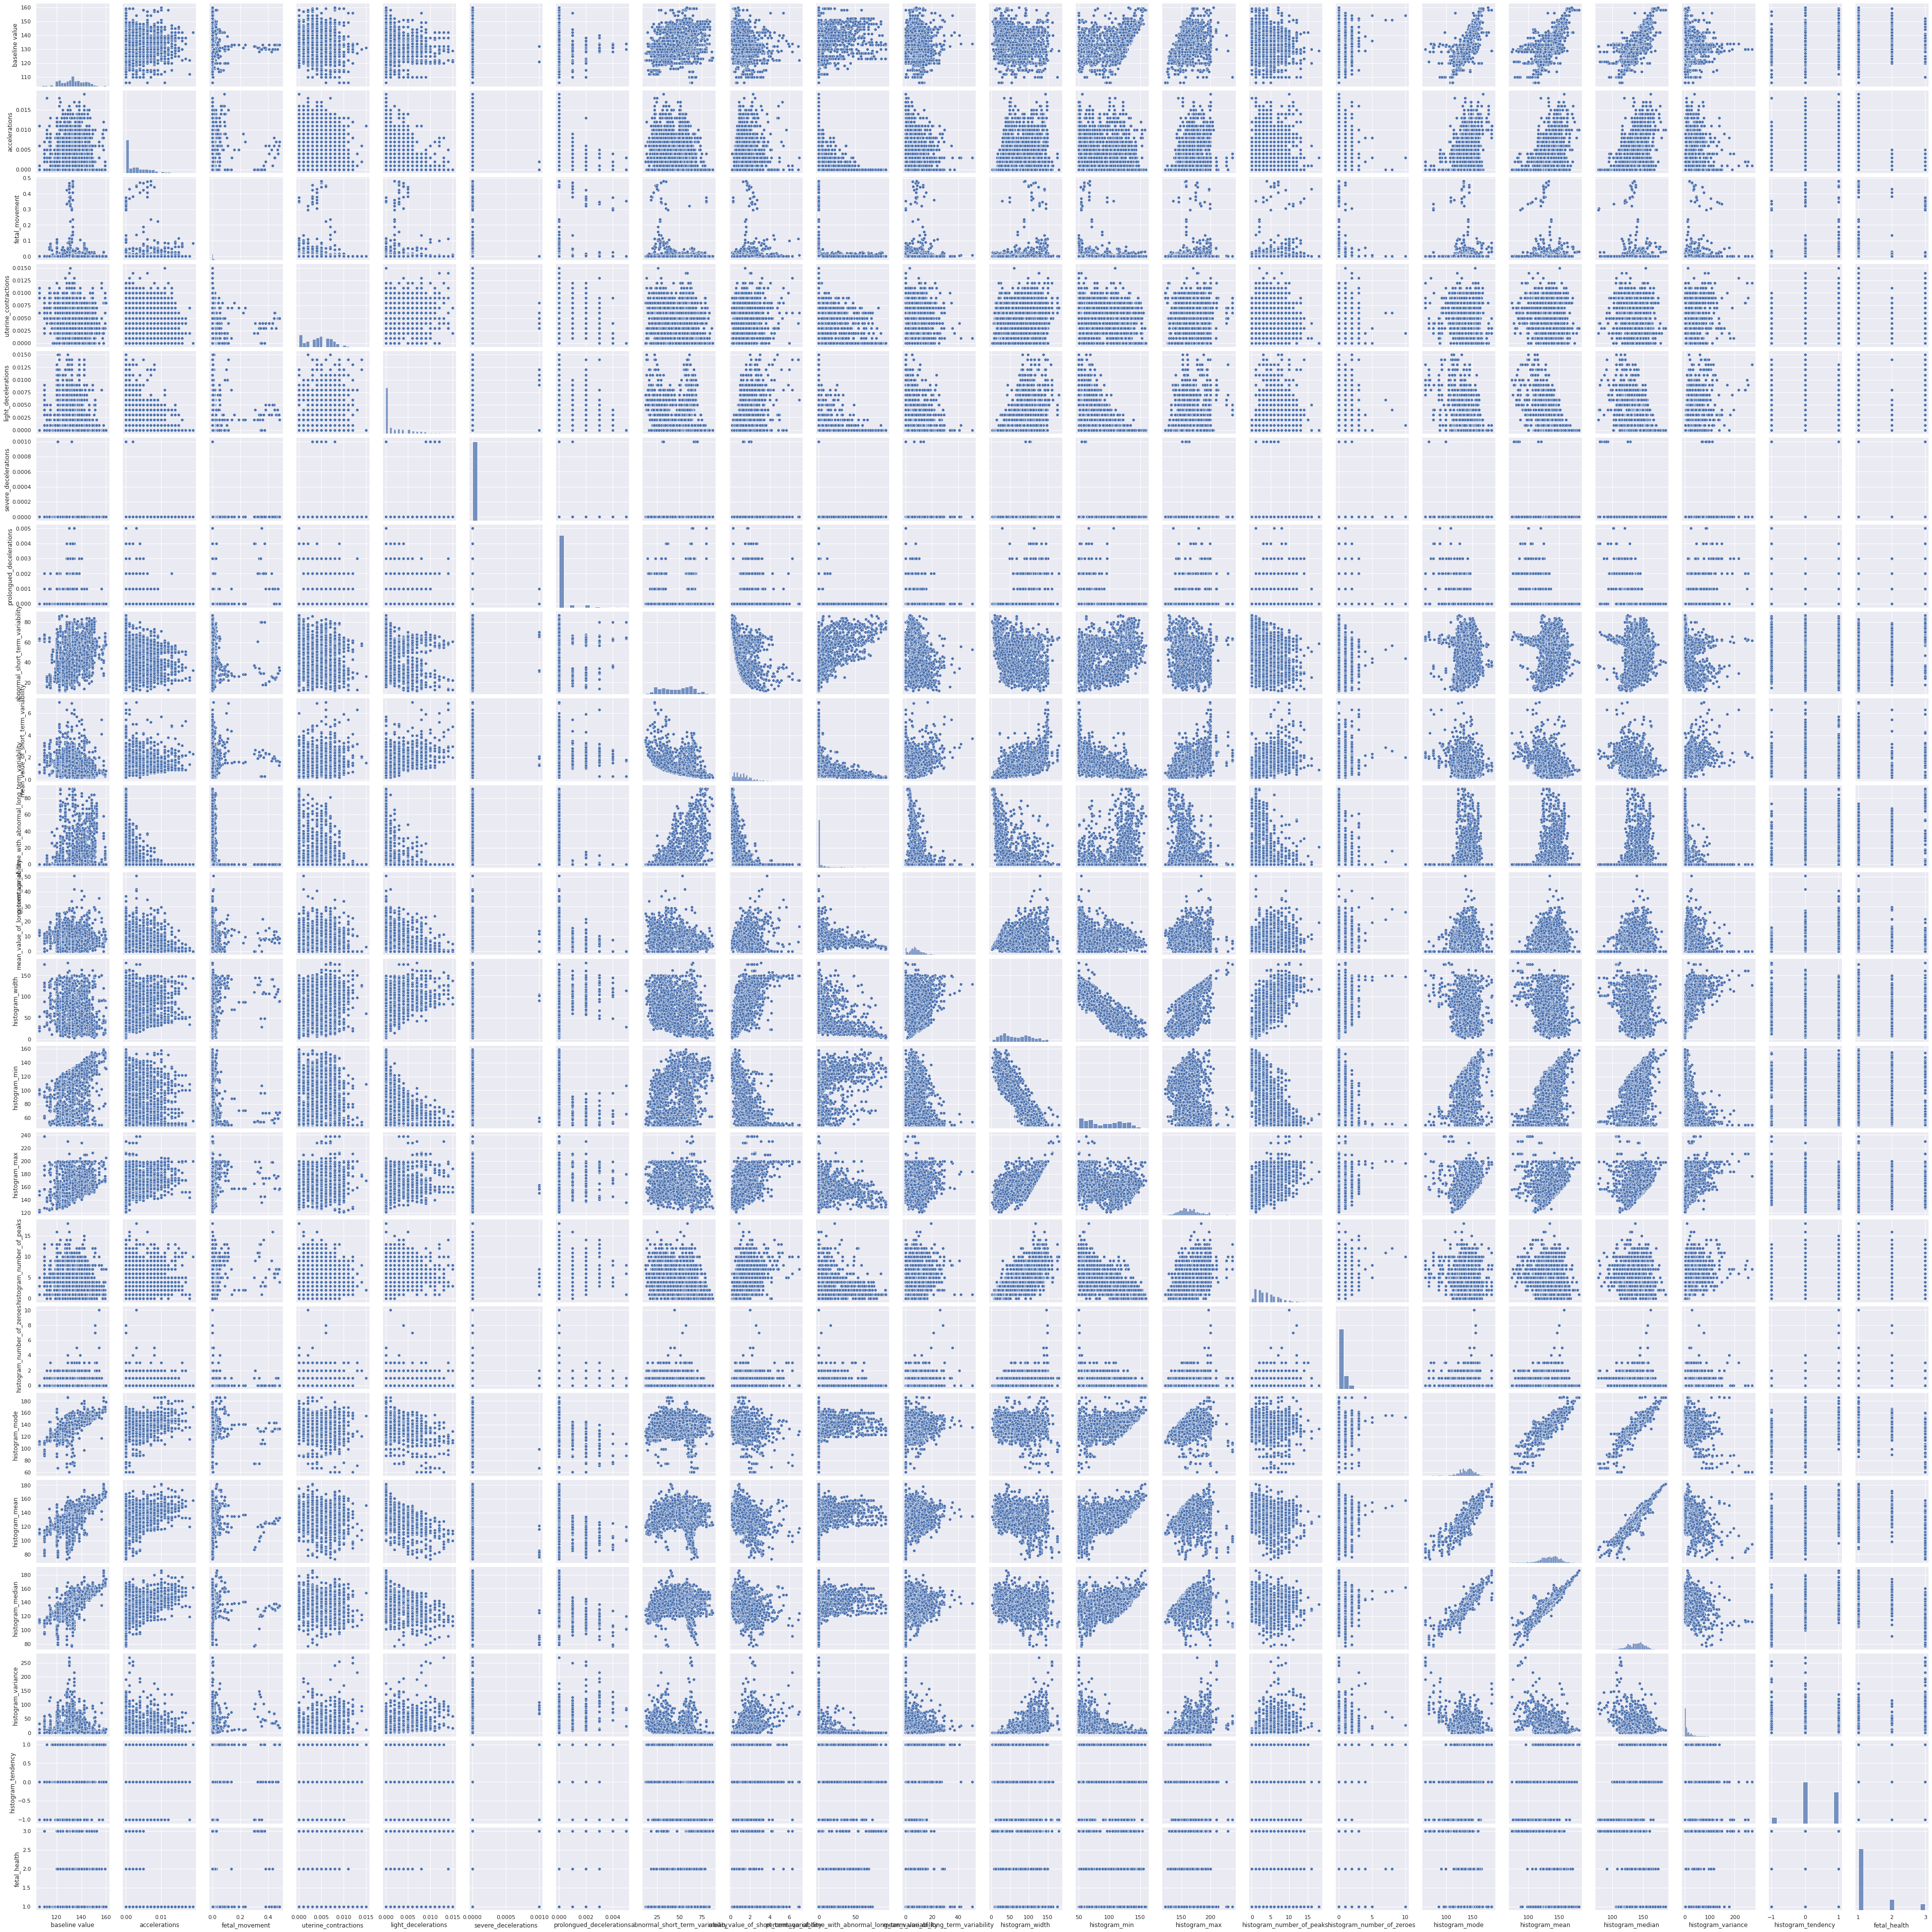

In [9]:
sns.pairplot(df)

In [10]:
df.describe().T

count        mean  \
baseline value                                      2126.0  133.303857   
accelerations                                       2126.0    0.003178   
fetal_movement                                      2126.0    0.009481   
uterine_contractions                                2126.0    0.004366   
light_decelerations                                 2126.0    0.001889   
severe_decelerations                                2126.0    0.000003   
prolongued_decelerations                            2126.0    0.000159   
abnormal_short_term_variability                     2126.0   46.990122   
mean_value_of_short_term_variability                2126.0    1.332785   
percentage_of_time_with_abnormal_long_term_vari...  2126.0    9.846660   
mean_value_of_long_term_variability                 2126.0    8.187629   
histogram_width                                     2126.0   70.445908   
histogram_min                                       2126.0   93.579492   
histogram_max                                       2126.0  164.025400   
histogram_number_of_peaks                           2126.0    4.068203   
histogram_number_of_zeroes                          2126.0    0.323612   
histogram_mode                                      2126.0  137.452023   
histogram_mean                                      2126.0  134.610536   
histogram_median                                    2126.0  138.090310   
histogram_variance                                  2126.0   18.808090   
histogram_tendency                                  2126.0    0.320320   
fetal_health                                        2126.0    1.304327   

                                                          std    min      25%  \
baseline value                                       9.840844  106.0  126.000   
accelerations                                        0.003866    0.0    0.000   
fetal_movement                                       0.046666    0.0    0.000   
uterine_contractions                                 0.002946    0.0    0.002   
light_decelerations                                  0.002960    0.0    0.000   
severe_decelerations                                 0.000057    0.0    0.000   
prolongued_decelerations                             0.000590    0.0    0.000   
abnormal_short_term_variability                     17.192814   12.0   32.000   
mean_value_of_short_term_variability                 0.883241    0.2    0.700   
percentage_of_time_with_abnormal_long_term_vari...  18.396880    0.0    0.000   
mean_value_of_long_term_variability                  5.628247    0.0    4.600   
histogram_width                                     38.955693    3.0   37.000   
histogram_min                                       29.560212   50.0   67.000   
histogram_max                                       17.944183  122.0  152.000   
histogram_number_of_peaks                            2.949386    0.0    2.000   
histogram_number_of_zeroes                           0.706059    0.0    0.000   
histogram_mode                                      16.381289   60.0  129.000   
histogram_mean                                      15.593596   73.0  125.000   
histogram_median                                    14.466589   77.0  129.000   
histogram_variance                                  28.977636    0.0    2.000   
histogram_tendency                                   0.610829   -1.0    0.000   
fetal_health                                         0.614377    1.0    1.000   

                                                        50%      75%      max  
baseline value                                      133.000  140.000  160.000  
accelerations                                         0.002    0.006    0.019  
fetal_movement                                        0.000    0.003    0.481  
uterine_contractions                                  0.004    0.007    0.015  
light_decelerations                                   0.000    0.003    0.015  
severe

In [11]:
df.skew()

baseline value                                             0.020312
accelerations                                              1.204392
fetal_movement                                             7.811477
uterine_contractions                                       0.159315
light_decelerations                                        1.718437
severe_decelerations                                      17.353457
prolongued_decelerations                                   4.323965
abnormal_short_term_variability                           -0.011829
mean_value_of_short_term_variability                       1.657339
percentage_of_time_with_abnormal_long_term_variability     2.195075
mean_value_of_long_term_variability                        1.331998
histogram_width                                            0.314235
histogram_min                                              0.115784
histogram_max                                              0.577862
histogram_number_of_peaks                       

Let's check if there is any duplicates in the dataset.

In [12]:
df[df.duplicated()]

baseline value  accelerations  fetal_movement  uterine_contractions  \
68             140.0          0.007           0.000                 0.004   
234            123.0          0.000           0.000                 0.000   
306            145.0          0.000           0.020                 0.000   
324            135.0          0.000           0.000                 0.000   
333            144.0          0.000           0.019                 0.000   
787            123.0          0.003           0.003                 0.000   
791            123.0          0.003           0.004                 0.000   
798            146.0          0.000           0.000                 0.003   
849            138.0          0.002           0.000                 0.004   
1113           122.0          0.000           0.000                 0.000   
1114           122.0          0.000           0.000                 0.000   
1115           122.0          0.000           0.000                 0.000   
1458           148.0          0.005           0.000                 0.002   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
68                    0.0                   0.0                       0.0   
234                   0.0                   0.0                       0.0   
306                   0.0                   0.0                       0.0   
324                   0.0                   0.0                       0.0   
333                   0.0                   0.0                       0.0   
787                   0.0                   0.0                       0.0   
791                   0.0                   0.0                       0.0   
798                   0.0                   0.0                       0.0   
849                   0.0                   0.0                       0.0   
1113                  0.0                   0.0                       0.0   
1114                  0.0                   0.0                       0.0   
1115                  0.0                   0.0                       0.0   
1458                  0.0                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
68                               34.0                                   1.2   
234                              49.0                                   0.8   
306                              77.0                                   0.2   
324                              62.0                                   0.5   
333                              76.0                                   0.4   
787                              52.0                                   0.8   
791                              50.0                                   0.9   
798                              65.0                                   0.4   
849                              41.0                                   0.8   
1113                             19.0                                   1.9   
1114                             19.0                                   1.9   
1115                             19.0                                   1.9   
1458                             40.0                                   0.9   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
68                                                  0.0       ...   
234                                                 7.0       ...   
306                                                45.0       ...   
324                                                71.0       ...   
333                                                61.0       ...   
787                                                 2.0       ...   
791                                                 4.0       ...   
798                                                39.0       ...   
849                                                 8.0       ...   
1113                                               

In [13]:
df_dup = df.drop_duplicates(subset = None , keep = 'first', inplace = False)

In [14]:
df_dup.shape

(2113, 22)

In [15]:
Target = df["fetal_health"]

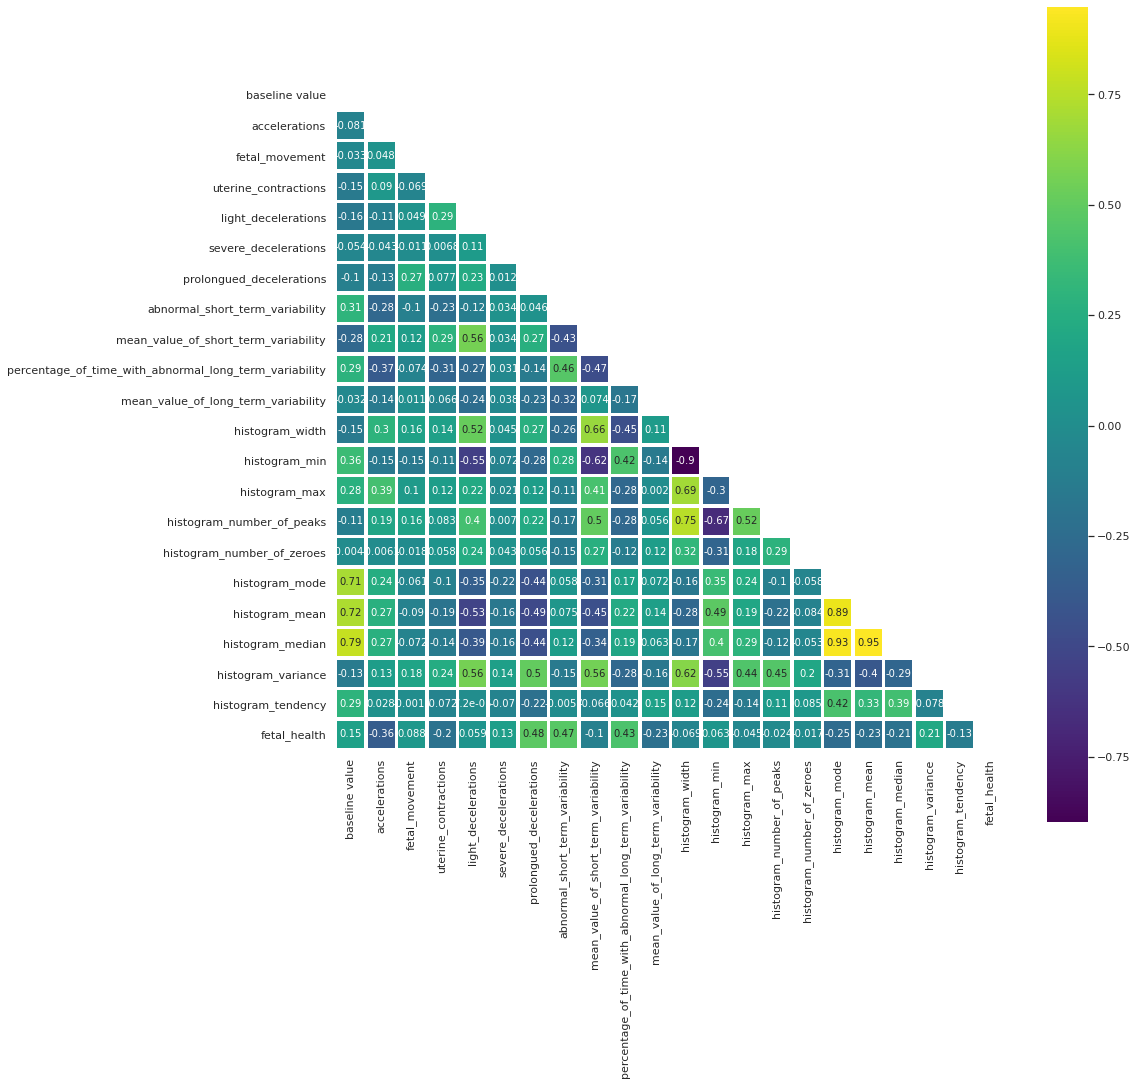

In [16]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=2.5,cmap="viridis",annot=True)

There is strong correlation between baseline value and histogram mode , histogram median and histogram mean.

Histogram number of peaks and histogram width is also having good correlation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


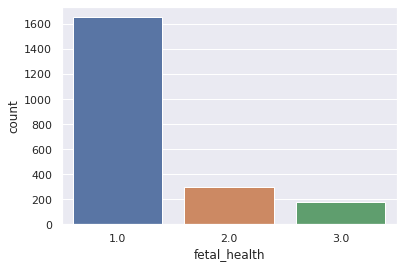

In [17]:
sns.countplot(Target)
plt.show()

In [18]:
print("Count of type 1.0 fetal health in the dataset ",len(df.loc[df["fetal_health"]==1.0]))
print("Count of type 2.0 fetal health in the dataset ",len(df.loc[df["fetal_health"]==2.0]))
print("Count of type 3.0 fetal health in the dataset ",len(df.loc[df["fetal_health"]==3.0]))

Count of type 1.0 fetal health in the dataset  1655
Count of type 2.0 fetal health in the dataset  295
Count of type 3.0 fetal health in the dataset  176


In [19]:
updated_cols = list(df.columns)
for column in updated_cols:
    print(column," : ", len(df.loc[df[column]<0]))

baseline value  :  0
accelerations  :  0
fetal_movement  :  0
uterine_contractions  :  0
light_decelerations  :  0
severe_decelerations  :  0
prolongued_decelerations  :  0
abnormal_short_term_variability  :  0
mean_value_of_short_term_variability  :  0
percentage_of_time_with_abnormal_long_term_variability  :  0
mean_value_of_long_term_variability  :  0
histogram_width  :  0
histogram_min  :  0
histogram_max  :  0
histogram_number_of_peaks  :  0
histogram_number_of_zeroes  :  0
histogram_mode  :  0
histogram_mean  :  0
histogram_median  :  0
histogram_variance  :  0
histogram_tendency  :  165
fetal_health  :  0


In [20]:
X = df_dup.iloc[:,:-1]
y = df_dup.iloc[:,-1]

In [21]:
y.value_counts()

1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64

In [22]:
scale = StandardScaler()
X = scale.fit_transform(X)
X = pd.DataFrame(X,columns=df_dup.iloc[:,:-1].columns)

Random sample Imputer for improving the class imbalance in the target column.

In [23]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=42)
X_ros, y_ros = ROS.fit_resample(X,y)
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_ros))

Resampled dataset shape Counter({2.0: 1646, 1.0: 1646, 3.0: 1646})


In [24]:
import statsmodels.api as sm
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (1690, 22)
y_train (1690,)
X_test (423, 22)
y_test (423,)


In [25]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(y.index)) * 100))

79.49% data is in training set
20.02% data is in test set


In [26]:
def get_train_report(model):
    
    train_pred = model.predict(X_train)
    return(classification_report(y_train, train_pred))

In [27]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

**Decision Tree Classifier**

In [28]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree = decision_tree_classification.fit(X_train, y_train)
from sklearn.metrics import classification_report

In [29]:
train_report = get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1320
         2.0       1.00      1.00      1.00       237
         3.0       1.00      1.00      1.00       133

    accuracy                           1.00      1690
   macro avg       1.00      1.00      1.00      1690
weighted avg       1.00      1.00      1.00      1690



In [30]:
test_report = get_test_report(decision_tree)
print(test_report)

              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       326
         2.0       0.78      0.76      0.77        55
         3.0       0.95      0.83      0.89        42

    accuracy                           0.93       423
   macro avg       0.89      0.86      0.87       423
weighted avg       0.93      0.93      0.93       423



In [31]:
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

# fit the model using fit() on train data
decision_tree = dt_model.fit(X_train, y_train)
train_report = get_train_report(decision_tree)

# print the performance measures
print('Train data:\n', train_report)
test_report = get_test_report(decision_tree)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

         1.0       0.93      0.97      0.95      1320
         2.0       0.82      0.62      0.71       237
         3.0       0.90      0.92      0.91       133

    accuracy                           0.92      1690
   macro avg       0.88      0.84      0.85      1690
weighted avg       0.91      0.92      0.91      1690

Test data:
               precision    recall  f1-score   support

         1.0       0.92      0.95      0.94       326
         2.0       0.76      0.62      0.68        55
         3.0       0.87      0.81      0.84        42

    accuracy                           0.90       423
   macro avg       0.85      0.79      0.82       423
weighted avg       0.89      0.90      0.89       423



**Random Forest**

In [32]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

In [33]:
train_report = get_train_report(rf_model)
print(train_report) 

              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00      1320
         2.0       0.99      0.97      0.98       237
         3.0       1.00      0.98      0.99       133

    accuracy                           0.99      1690
   macro avg       1.00      0.98      0.99      1690
weighted avg       0.99      0.99      0.99      1690



In [34]:
test_report = get_test_report(rf_model)
print(test_report) 

              precision    recall  f1-score   support

         1.0       0.93      0.98      0.96       326
         2.0       0.82      0.67      0.74        55
         3.0       0.92      0.79      0.85        42

    accuracy                           0.92       423
   macro avg       0.89      0.81      0.85       423
weighted avg       0.92      0.92      0.92       423



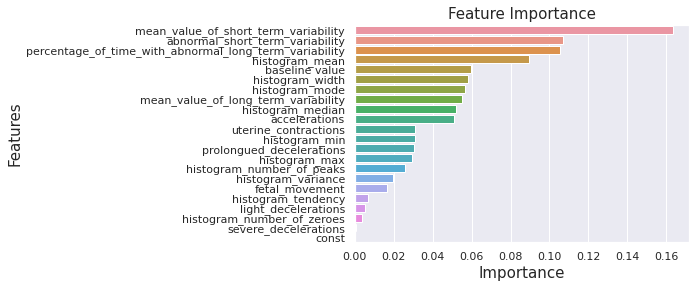

In [35]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

From the above bar plot, we can see that short term variability is the most important feature in the dataset.

**K Nearest Neighbors**

In [36]:
from sklearn.metrics import confusion_matrix,roc_curve
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

In [37]:
train_report = get_train_report(knn_model)
print(train_report) 

              precision    recall  f1-score   support

         1.0       0.96      0.99      0.98      1320
         2.0       0.89      0.79      0.84       237
         3.0       0.94      0.88      0.91       133

    accuracy                           0.95      1690
   macro avg       0.93      0.89      0.91      1690
weighted avg       0.95      0.95      0.95      1690



In [38]:
test_report = get_test_report(knn_model)
print(test_report)

              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       326
         2.0       0.70      0.67      0.69        55
         3.0       0.89      0.74      0.81        42

    accuracy                           0.90       423
   macro avg       0.84      0.79      0.81       423
weighted avg       0.90      0.90      0.90       423



In [39]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()

knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_base.py", line 336, in _check_algorithm_metric
    % (self.metric, alg_check))
ValueError: Metric 'Chebyshev' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/opt/conda/lib/p

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 7} 



/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_base.py", line 336, in _check_algorithm_metric
    % (self.metric, alg_check))
ValueError: Metric 'Chebyshev' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/opt/conda/lib/p

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 7}

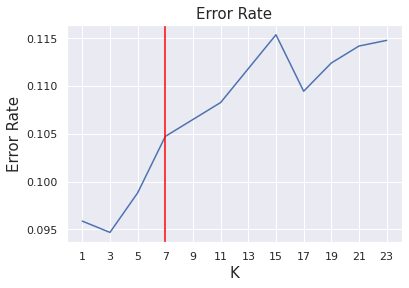

In [40]:
from sklearn.model_selection import cross_val_score
error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,25,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'euclidean')
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn, X_train, y_train, cv = 5)
    
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,25,2), error_rate)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 25, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 7, color = 'red')

# display the plot
plt.show()

We can see that the optimal value of K = 7 obtained from the GridSearchCV results in a lowest error rate.

In [41]:
train_report = get_train_report(knn_grid)
print(train_report) 

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96      1320
         2.0       0.84      0.72      0.77       237
         3.0       0.98      0.83      0.90       133

    accuracy                           0.93      1690
   macro avg       0.92      0.84      0.88      1690
weighted avg       0.93      0.93      0.93      1690



In [42]:
test_report = get_test_report(knn_grid)
print(test_report) 

              precision    recall  f1-score   support

         1.0       0.91      0.97      0.94       326
         2.0       0.69      0.62      0.65        55
         3.0       0.86      0.60      0.70        42

    accuracy                           0.88       423
   macro avg       0.82      0.73      0.77       423
weighted avg       0.88      0.88      0.88       423



**Gaussian Naive Bayes**

In [43]:
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(X_train, y_train)

In [44]:
test_report = get_test_report(gnb_model)
print(test_report) 

              precision    recall  f1-score   support

         1.0       0.98      0.86      0.91       326
         2.0       0.48      0.87      0.62        55
         3.0       0.78      0.69      0.73        42

    accuracy                           0.84       423
   macro avg       0.75      0.81      0.76       423
weighted avg       0.89      0.84      0.86       423



**Adaboost Classifier**

In [45]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [46]:
test_report = get_test_report(ada_model)
print(test_report)

              precision    recall  f1-score   support

         1.0       0.92      0.94      0.93       326
         2.0       0.66      0.69      0.67        55
         3.0       0.94      0.74      0.83        42

    accuracy                           0.89       423
   macro avg       0.84      0.79      0.81       423
weighted avg       0.89      0.89      0.89       423



**Gradient Boosting Classifier**

In [47]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [48]:
test_report = get_test_report(gboost_model)
print(test_report)

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       326
         2.0       0.87      0.82      0.84        55
         3.0       0.95      0.86      0.90        42

    accuracy                           0.94       423
   macro avg       0.92      0.88      0.90       423
weighted avg       0.94      0.94      0.94       423



**XG Boost Classifier**

In [49]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_model.fit(X_train, y_train)

[12:42:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
test_report = get_test_report(xgb_model)
print(test_report)

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       326
         2.0       0.88      0.82      0.85        55
         3.0       0.94      0.81      0.87        42

    accuracy                           0.94       423
   macro avg       0.93      0.87      0.89       423
weighted avg       0.94      0.94      0.94       423



In [51]:
#important_features = pd.DataFrame({'Features': X_train.columns, 'Importance': xgb_model.feature_importances_})
#important_features = important_features.sort_values('Importance', ascending = False)

#sns.barplot(x = 'Importance', y = 'Features', data = important_features)
#plt.title('Feature Importance', fontsize = 15)
#plt.xlabel('Importance', fontsize = 15)
#plt.ylabel('Features', fontsize = 15)
#plt.show()

**Support Vector Machine**

In [52]:
svc_model = SVC(kernel='poly',probability=True)
svc_model.fit(X_train,y_train)

SVC(kernel='poly', probability=True)

In [53]:
test_report = get_test_report(svc_model)
print(test_report)

              precision    recall  f1-score   support

         1.0       0.92      0.97      0.95       326
         2.0       0.69      0.60      0.64        55
         3.0       0.90      0.67      0.77        42

    accuracy                           0.89       423
   macro avg       0.84      0.75      0.78       423
weighted avg       0.89      0.89      0.89       423



Voting Classifier 

In [54]:
clf1 = KNeighborsClassifier(n_neighbors = 7 , weights = 'distance', metric='manhattan' )
clf2 = GradientBoostingClassifier(n_estimators = 150,max_depth = 10,random_state=1)

votingclf = VotingClassifier(estimators=[('knn',clf1),('grb', clf2)],voting='hard')
votingclf = votingclf.fit(X_train,y_train)

In [55]:
test_report = get_test_report(votingclf)
print(test_report)

              precision    recall  f1-score   support

         1.0       0.92      0.98      0.95       326
         2.0       0.82      0.65      0.73        55
         3.0       0.97      0.67      0.79        42

    accuracy                           0.91       423
   macro avg       0.90      0.77      0.82       423
weighted avg       0.91      0.91      0.90       423



We tried different algorithms for this dataset among them the boosting based algorithms i.e, XG Boost and Gradient boosting algorithms are performing best for the dataset with an accuracy of 94% on the test dataset and f1 score for XGBoost are 0.96 , 0.85 and 0.87 respectively for three different classes followed by Decision Tree Classifier without hypertuning it with an accuracy of 93% on the test data.

*PLEASE UPVOTE IF YOU LIKE THE ANALYSIS*